In [5]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt
import pygame
import csv

    


In [6]:
env=gym.make("Taxi-v3", render_mode="human")
env.reset()
env.render()

In [7]:
episodes=500
alpha=0.7
gamma=0.9
epsilon=0.001
num_rows=env.observation_space.n
num_columns=env.action_space.n
qtable=np.zeros((num_rows,4,5,num_columns))
print(qtable)
qtable=np.load('qvaluesusingMC.npy')
print(qtable)

[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0

In [8]:
outcomes=[]
countlist=[]
for epi in range(episodes):
    state=env.reset()
    state=state[0]
    statecopy=state
    done=False
    curr_outcome="Failure"
    outcomes.append(curr_outcome)
    counter=0
    returns=[]
    states=[]
    actions=[]
    while not done:
        counter=counter+1
        if np.random.uniform(0,1)<epsilon:
            action=env.action_space.sample()
        elif np.max(qtable[state][state%4][(statecopy//4)%5])>0:
            action=np.argmax(qtable[state][state%4][(statecopy//4)%5])
        else:
            action=env.action_space.sample()
        new_state, reward, terminated, truncated, info=env.step(action)
        done= truncated or terminated
        a=0
        for i in returns:
            returns[-1-a]=returns[-1-a]+pow(gamma,1+a)*reward
            a=a+1
        returns.append(reward)
        states.append(state)
        actions.append(action)
        state=new_state
        if reward==20:
            outcomes[-1]="Success"
    countlist.append(counter) 
    a=0
    for i in returns:
        qtable[states[a],states[a]%4,(states[a]//4)%5,actions[a]] = qtable[states[a],states[a]%4,(states[a]//4)%5,actions[a]]+alpha*(returns[a]-qtable[states[a],states[a]%4,(states[a]//4)%5,actions[a]])
        a=a+1
print(qtable)
np.save('qvaluesusingMC',qtable)
        
        
    
        
            

[[[[  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0. 

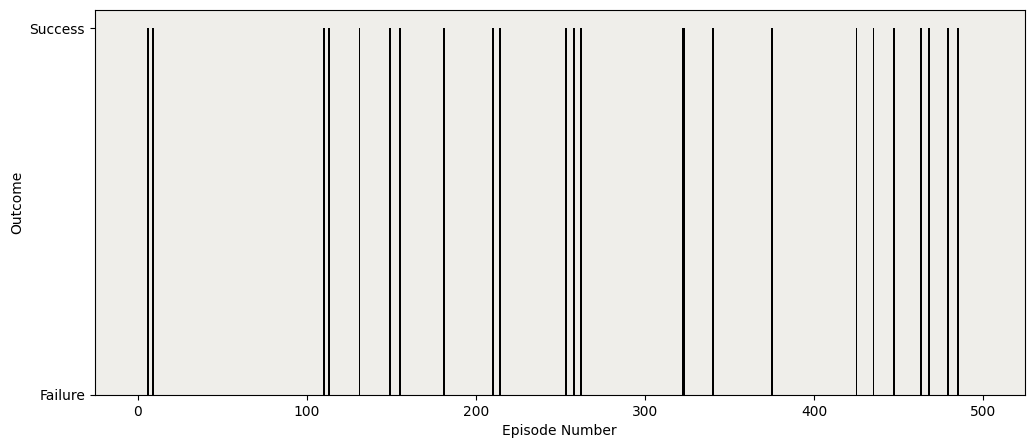

In [9]:
plt.figure(figsize=(12,5))
plt.xlabel("Episode Number")
plt.ylabel("Outcome")
ax=plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="black",width=1)
plt.show()

In [10]:
print(outcomes)
print(countlist)

['Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Success', 'Failure', 'Failure', 'Success', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure'

In [ ]:
env.close()